# Estimating Probabilities

In Artificial Intelligence, Data Science and Machine Learning we often have data, which is structured like this:

<figure align="center">
<img src="https://maucher.home.hdm-stuttgart.de/Pics/datascheme.png" style="width:500px" align="center">
</figure>
    
The dataset consists of $Z$ instances, each instance is described by the values of $N$ random variables $X_1,X_2,\ldots,X_N$. For example, each instance refers to a person, which is described by the $N=4$ random variables 
    
$$
Age, \; Weight,\; Height, \; Marital Status.
$$

Subject of this section is the **estimation of probabilities from datasets**. More concrete we distinguish
* estimation of univariate discrete probability distributions
* estimation of univariate continuous probability distributions
* estimation of multivariate discrete probability distributions
* estimation of multivariate continuous probability distributions 

**Notation:** In this section the notation is as follows
* $T$ is the available dataset, consisting of $Z$ instances.
* $X$ is a random variable
* $V(X)$ is the set of possible values, which can be taken by $X$
* $P(X=x_i)$ is the estimated probability, that variable $X$ takes the value $x_i$.
* $\#x_i$ is the number of instances, for which $X=x_i$ is true

## Univariate Distribution

### Discrete
For a discrete random variable $X$ the probability $P(X=x_i)$ can be estimated from a dataset of $Z$ instances by just counting the number of instances for which $X=x_i$ is true and dividing this frequency by $Z$:

$$
P(X=x_i) = \frac{\# x_i}{Z} \quad \forall x_i \in V(X).
$$

The set of estimated $P(X=x_i)$ for all $x_i \in V(X)$, is the estimated probability distribution (proability mass function) of $X$.

**Example:** In a sample of $Z=20$ families the numbers of children per family are:

In [1]:
children=[2,2,0,1,4,3,3,0,2,1,0,5,4,2,2,2,3,1,1,1]

From this sample the probabilities for the number of childrens per family can be estimated by just counting how often a *number-of-childrens* occurs and dividing this number by the total number $Z$ of families (here $Z=20$).

In [2]:
probs=[]
Z=len(children)
for c in range(6):
    count=len([z for z in children if z==c])
    p=count/Z
    probs.append(p)
    print("Est. prob. P(children={}) is {:1.2f}".format(c,p) )

Est. prob. P(children=0) is 0.15
Est. prob. P(children=1) is 0.25
Est. prob. P(children=2) is 0.30
Est. prob. P(children=3) is 0.15
Est. prob. P(children=4) is 0.10
Est. prob. P(children=5) is 0.05


These estimated probabilities define the estimated probability mass function, which is plotted below:

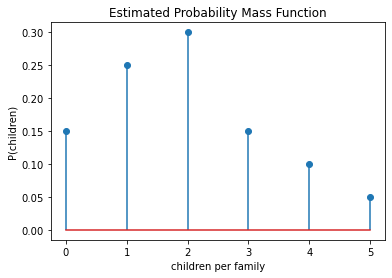

In [3]:
from matplotlib import pyplot as plt
plt.stem(range(6),probs)
plt.title("Estimated Probability Mass Function")
plt.xlabel("children per family")
plt.ylabel("P(children)")
plt.show()

### Continuous

For estimating the probability distribution (probability density function) of continuous random variables, one must
1. assume a certain type of distribution, e.g. Gaussian Distribution
2. estimate the parameters, which uniquely define the concrete function of the assumed type.

By far the most common type of continuous random variable is the Gaussion distribution, whose probability density function is defined by:

$$p_X(x)=\frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}, 
$$

This function has two parameters:
* mean value $\mu$
* standard deviation $\sigma$.

From a given set of $Z$ samples the mean $\mu$ is estimated by 

$$
m=\frac{1}{Z}\sum\limits_{i=1}^Z x_i 
$$

and the estimate for the standard deviation is

$$
s=\sqrt{\frac{1}{Z-1}\sum_{i=1}^Z (x_i-m)^2}.
$$

**Example:** The measrued weights (in kg) for a sample of $Z=10$ adults are:

In [4]:
weights=[67,58,72,98,87,75,54,86,90,77]

The estimated mean is then:

In [5]:
import numpy as np
np.set_printoptions(precision=2)
m=1/10*np.sum(weights)
print("Estimated mean = {:3.2f}".format(m))

Estimated mean = 76.40


And the estimated standard deviation is:

In [6]:
s=np.sqrt(1/(10-1)*np.sum([(w-m)**2 for w in weights]))
print("Estimated standard deviation = {:3.2f}".format(s))

Estimated standard deviation = 14.17


The estimated probability density function is then:

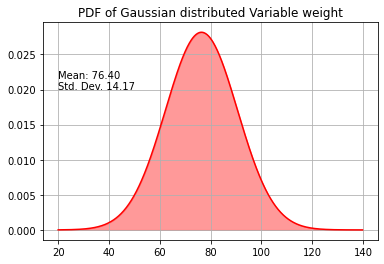

In [7]:
x=np.arange(20,140,0.2)
prob=1/(s * np.sqrt(2 * np.pi))*np.exp( - (x - m)**2 / (2 * s**2) )
plt.plot(x,prob,'r')
plt.fill_between(x,prob,color="red",alpha=0.4)
plt.text(20,0.02,"Mean: %2.2f  \nStd. Dev. %2.2f" % (m,s))
plt.title("PDF of Gaussian distributed Variable weight")
plt.grid(True)
plt.show()

## Multivariate Distribution

### Discrete

For a set of $N$ random variables $X_1,X_2,\ldots,X_N$ each **joint probability** 

$$
P(X_1=x_{i_1},X_2=x_{i_2}, \ldots, X_N=x_{i_N}) \quad \mbox{ or for short} \quad P(x_{i_1},x_{i_2}, \ldots, x_{i_N})
$$

can be estimated from a dataset $T$ of $Z$ instances, by just counting how many instances with 

$$
X_1=x_{i_1} \mbox{ and } X_2=x_{i_2} \mbox{ and } \cdots, \mbox{ and } X_N=x_{i_N}
$$

occur in $T$. If this number is denoted by $\#(x_{i_1},x_{i_2},\ldots,x_{i_N})$, then the estimated joint probability is 

$$
P(x_{i_1},x_{i_2}, \ldots, x_{i_N}) =\frac{\#(x_{i_1},x_{i_2},\ldots,x_{i_N})}{Z}
$$



The set of all such estimated joint probabilities defines the **estimated joint probability distribution**. 

**Example:** In a sample of $Z=20$ families the numbers of children per family are:


In [8]:
children=[2,2,0,1,4,3,3,0,2,1,0,5,4,2,2,2,3,1,1,1]

Moreover, for each of the 20 families it is also known if both parents, one parent or no parent is in work. This is specified in this vector (families are ordered in the same way as in the *children*-vector):

In [9]:
inwork  =[1,2,2,2,1,1,0,2,1,2,2,1,1,1,1,2,2,2,2,1]

Below, this dataset is represented as a pandas dataframe:

In [10]:
import pandas as pd
famData=pd.DataFrame({"children":children,"workparents":inwork})
famData

,children,workparents
0,2,1
1,2,2
2,0,2
3,1,2
4,4,1
5,3,1
6,3,0
7,0,2
8,2,1
9,1,2


Having, the data in a pandas dataframe, it is easy to calculate the estimated joint probabilities, by applying the method `crosstab()` as follows:

In [11]:
pd.crosstab(famData.children,famData.workparents,normalize="all")

workparents,0,1,2
children,,,
0,0.00,0.00,0.15
1,0.00,0.05,0.20
2,0.00,0.20,0.10
3,0.05,0.05,0.05
4,0.00,0.10,0.00
5,0.00,0.05,0.00


For example there are 4 families in $T$, which have 1 child and where both parents are in work. The estimated joint probability is then:

$$
P(children=1,inwork=2)=\frac{4}{20}=0.2
$$

### Continuous

In the case of multiple continuous random variables, in nearly all practical cases one of two options is applied:

1. One (naively) assumes that all variables are independent of each other. Then the joint probability distribution is estimated as the product of the estimated univariate distributions 

2. The $N$ continuous random variables are assumed to be jointly Gaussian distributed

In this section we consider the second case, i.e. we assume, that the $N$ random variables are jointly Gaussian distributed.

Recall that the joint probability function for **multi-dimensional Gaussian distribution**, is defined by:

\begin{equation}
  p(\mathbf{x})=\frac{1}{(2 \pi)^{d/2} |\Sigma|^{1/2}} \exp\left[-\frac{1}{2}(\mathbf{x}- \boldsymbol\mu)^T \Sigma^{-1}(\mathbf{x}-\boldsymbol\mu)\right] , \quad -\infty < x < \infty, 
\end{equation}

where

* $\mathbf{x}=\left[x_1,x_2,\ldots,x_N \right]$ are the values of $N$ random variables, which are jointly Gaussian distributed.

* $\mathbf{\mu}=[\mu_1,\mu_2,\ldots, \mu_N]$ is mean-value-vektor
* and

$$
\Sigma = \left(
	\begin{array}{cccc}
	\sigma_{11}^2 & \sigma_{12} &\cdots & \sigma_{1N} \\
	\sigma_{21} & \sigma_{22}^2 &\cdots & \sigma_{2N} \\
	\vdots      & \vdots      & \ddots &  \vdots \\
	\sigma_{N1} & \sigma_{N2} & \cdots & \sigma_{NN}^2 \\
	\end{array} \right)
$$

is the Covariance Matrix. In this matrix the elements on the principal diagonal $\sigma_{ii}^2$ are the variances along the corresponding axis. All other elements are covariances, which describe the correlation between the axes. If $\sigma_{ij}=0$, then the random variables $X_i$ and $X_j$ are not correlated. The higher the absolute value of $\sigma_{ij}$, the stronger the correlation. 

From the variances and the covariances the **linear correlation-coefficient $\rho_{ij}$** can be calculated as follows:

$$
\rho_{ij}=\frac{\sigma_{ij}}{\sigma_{ii} \sigma_{jj}}
$$

The correlation coefficient has a value-range from $-1$ to $1$ and helps to better *quantify* the correlation between the axis.

In order to estimate a multi-dimensional Gaussian distribution from a dataset $T$, the mean-value-vektor $\mathbf{\mu}$ and the covariance matrix $\mathbf{\sigma}$ must be estimated. 

We denote the **estimation of the mean-value-vektor $\mu$** by $m=[m_1,m_2,\ldots m_N]$. The components of this vektor are just the columnwise mean-values of the datamatrix:

$$
m_i=\frac{1}{Z}\sum_{k=1}^Z x_{k,i} \quad \forall i \in \left\{ 1,N \right\}, 
$$

where $x_{k,i}$ is the value of random variable $X_i$ of instance $k$.

Moreover, the **estimation of the covariance matrix $\Sigma$** is denoted by $S$. And the components of $S$ are 

* the estimations of the variances $\sigma_{ii}^2$, which are denoted by $s_{ii}^2$
* the estimations of the covariances $\sigma_{ij}$, which are denoted by $s_{ij}$.

From a given dataset $T$ with $Z$ instances (rows) and $N$ random variables (columns), the variances and covariances are estimated as follows:

$$
s_{ii}^2=\frac{1}{Z-1}\sum_{k=1}^Z (x_{k,i}-m_i)^2
$$

$$
s_{ij}=\frac{1}{Z-1}\sum_{k=1}^Z (x_{k,i}-m_i) \cdot (x_{k,j}-m_j)
$$

**Example:** From a sample of 10 adults the weight in *kg* and the height in *cm* is given. These two random variables are assumed to be 2D-Gaussian distributed. In order to estimate the 2D-probability density function the mean-value-vektor $\mathbf{\mu}$ and the covariance-matrix $\Sigma$ must be estimated from the given datasample.

First we define the given dataset of 10 persons:

In [12]:
weights=[67,58,72,98,87,75,54,86,90,77]
heights=[170,173,175,192,188,182,160,181,186,180]
persons=pd.DataFrame()
persons["weight"]=weights
persons["height"]=heights
persons

,weight,height
0,67,170
1,58,173
2,72,175
3,98,192
4,87,188
5,75,182
6,54,160
7,86,181
8,90,186
9,77,180


In order to estimate the mean-value-vektor we calculate the column-wise mean:

In [13]:
m_weights=1/10*np.sum(weights)
m_heights=1/10*np.sum(heights)
print("Estimated Mean Vektor is m = %3.2f,%6.2f"%(m_weights,m_heights))

Estimated Mean Vektor is m = 76.40,178.70


Next we determine the estimation of the covariance matrix $\Sigma$:
    

In [14]:
var_weights=1/(10-1)*np.sum([(w-m_weights)**2 for w in weights])
var_heights=1/(10-1)*np.sum([(h-m_heights)**2 for h in heights])
cov=1/(10-1)*np.sum([(w-m_weights)*(h-m_heights) for w,h in zip(weights,heights)])
corr=cov/np.sqrt(var_weights*var_heights)
print("Correlation between weight and height is %1.2f"%corr)
est_cov=np.array([[var_weights,cov],[cov,var_heights]])
print("Estimated covariance matrix is S = \n",est_cov)

Correlation between weight and height is 0.93
Estimated covariance matrix is S = 
 [[200.71 125.02]
 [125.02  89.57]]


Next, the 10 datasamples and the 2-dimensional mean-vektor are plotted:

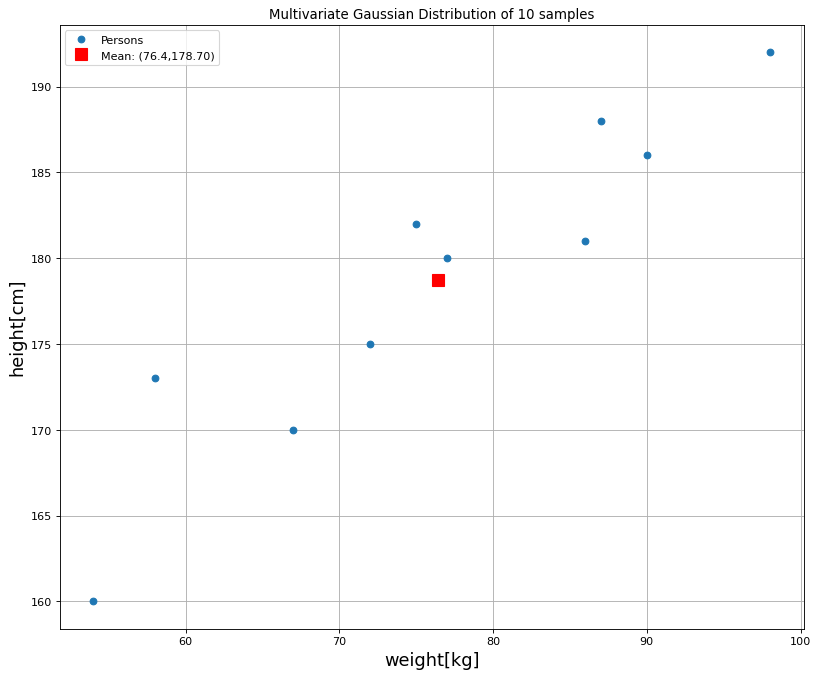

In [15]:
Numpoints=len(weights)
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(weights[:],heights[:],'o',ms=6,label="Persons")
plt.grid(True)
plt.title("Multivariate Gaussian Distribution of "+str(Numpoints)+" samples")
plt.xlabel('weight[kg]',fontsize=16)
plt.ylabel('height[cm]',fontsize=16)
plt.plot([m_weights],[m_heights],'sr',ms=10,label="Mean: ("+str(m_weights)+","+"%3.2f"%m_heights+")")
#plt.text(60,180,'s11='+str(s11)+'\ns22='+str(s22)+'\ncorr='+str(rho),fontsize=16,backgroundcolor='white')
plt.legend(loc=2,numpoints=1)
plt.show()

From the estimated mean-vektor and covariance matrix the entire 2-dimensional Gaussian distribution can be derived. The 2D-proability density function is plotted below:

In [16]:
from numpy import mgrid
from matplotlib import cm
x,y = mgrid[40:110:100j, 120:210:100j]
[m1,m2]=est_mean
s11=np.sqrt(est_cov[0,0])
s22=np.sqrt(est_cov[1,1])
corr=est_cov[0,1]/(s11*s22)


#2-dimensionale Gaußverteilung nach Definition http://de.wikipedia.org/wiki/Mehrdimensionale_Normalverteilung
a=1.0/(2*np.pi*s11*s22*np.sqrt(1-corr**2))*np.exp(-1.0/(2*(1-corr**2))*(((x-m1)**2)/(s11**2)+((y-m2)**2)/(s22**2)-2*corr*(x-m1)*(y-m2)/(s11*s22)))  
##############################################################################################################
fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x,y,a,rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0.0, antialiased=False)
#plt.text(0.5,0.5,0.2,'$\sigma_{11}$='+str(s11)+'\n$\sigma_{22}$='+str(s22)+'\n$corr$='+str(corr),fontsize=14,backgroundcolor='white')
plt.title('s11='+str(s11)+'  s22 = '+str(s22)+'  corr ='+str(corr))
plt.xlabel('weight[kg]')
plt.ylabel('height[cm]')
plt.show()

NameError: name 'est_mean' is not defined

In order to better understand the estimated 2D-Gaussian distribution it's contour-plot is also visualized:

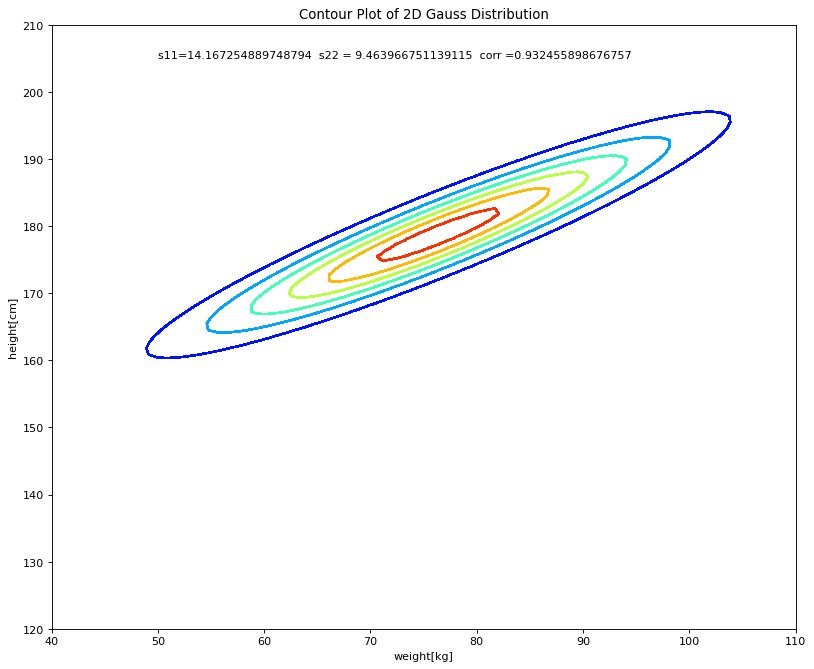

In [26]:
fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()
surf = ax.contour(x,y,a,cmap=cm.jet,antialiased=False)
plt.text(50,205,'s11='+str(s11)+'  s22 = '+str(s22)+'  corr ='+str(corr))
#plt.title('s11='+str(s11)+'  s22 = '+str(s22)+'  corr ='+str(corr))
plt.xlabel('weight[kg]')
plt.ylabel('height[cm]')
plt.title("Contour Plot of 2D Gauss Distribution")
plt.show()